In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import scipy.signal as sig
# Columns are datetime, upper temperature, lower temperature, heater temperature
frame = pd.read_csv('../data/tree4_log.csv', usecols=[1,2,3])
# Since we're not actually using the date, we won't bother parsing it.
#print(frame)
len = 152 #Each pulse is 152 samples long
frame = frame.to_numpy()
#print(frame)

       upper  lower  heater
0       6.91   6.75    3.86
1       6.94   6.80    6.76
2       6.97   6.83    6.78
3       6.98   6.85    6.80
4       7.00   6.86    6.82
...      ...    ...     ...
33131   3.80  11.40   10.54
33132   3.79  11.43   10.25
33133   3.79  11.45   10.14
33134   3.79  11.40   10.55
33135   3.79  11.35   10.39

[33136 rows x 3 columns]
[[ 6.91  6.75  3.86]
 [ 6.94  6.8   6.76]
 [ 6.97  6.83  6.78]
 ...
 [ 3.79 11.45 10.14]
 [ 3.79 11.4  10.55]
 [ 3.79 11.35 10.39]]


In [3]:
data = np.reshape(frame, (-1, len, 3))

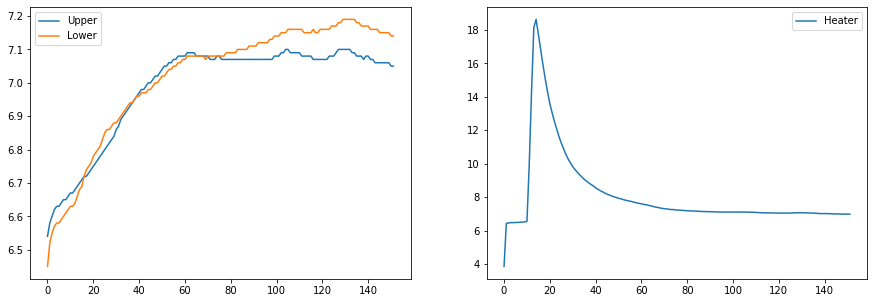

In [15]:
plt.subplot(121)
plt.plot(data[10,:,0], label='Upper')
plt.plot(data[10,:,1], label='Lower')
plt.legend()
plt.subplot(122)
plt.plot(data[10,:,2], label='Heater')
plt.legend()
plt.show()

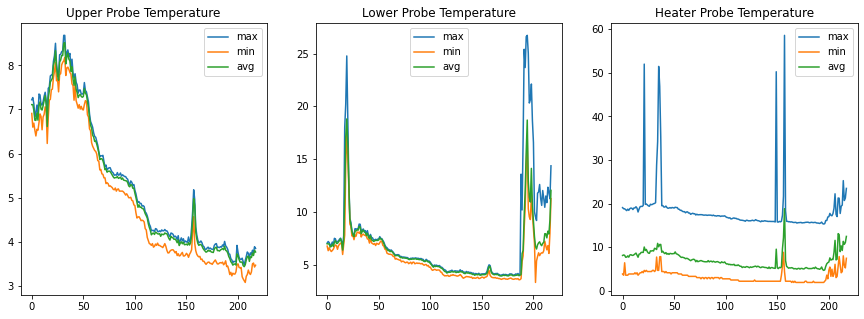

In [14]:
# Verify that our data is reasonable
maxes = data.max(axis=1)
mins = data.min(axis=1)
means = data.mean(axis=1)
plt.subplot(131)
plt.plot(maxes[:,0], label="max")
plt.plot(mins[:,0], label="min")
plt.plot(means[:,0], label="avg")
plt.title("Upper Probe Temperature")
plt.legend()
plt.subplot(132)
plt.plot(maxes[:,1], label="max")
plt.plot(mins[:,1], label="min")
plt.plot(means[:,1], label="avg")
plt.title("Lower Probe Temperature")
plt.legend()
plt.subplot(133)
plt.plot(maxes[:,2], label="max")
plt.plot(mins[:,2], label="min")
plt.plot(means[:,2], label="avg")
plt.title("Heater Probe Temperature")
plt.legend()
plt.show()

**Observations**
- Upper probe data looks pretty normal
- Lower probe data has an outlier, but is otherwise ok until around cycle 180
- Heater probe data has a few spikes. Maybe it didn't turn off? Or maybe water got into the ADC.

<ipython-input-32-d3ded70480d5>:4: RuntimeWarning: divide by zero encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
<ipython-input-32-d3ded70480d5>:4: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(delta[:,:,0],delta[:,:,1])
/usr/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-32-d3ded70480d5>:9: RuntimeWarning: invalid value encountered in log
  flow = np.log(flow)


(218, 152)


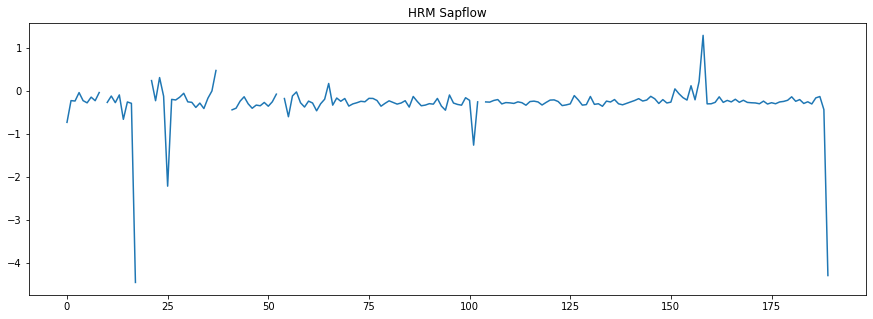

In [32]:
# Method from Burgess (2001)
baseline = data[:,0:9,:].max(axis=1)
delta = data - np.reshape(baseline, (-1,1,3))
ratio = np.divide(delta[:,:,0],delta[:,:,1])
# Start using the data 100 seconds after the heat pulse
# (The heat pulse finishes 13 seconds in)
flow = ratio[:,(100+13):].mean(axis=1)
flow = np.log(flow)
# We are supposed to also multiply by a constant scaling factor k/x * 3600
plt.plot(flow)
plt.title("HRM Sapflow")
plt.show()